In [1]:
import random
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**1.** Загрузить файл hr.csv

In [2]:
hr=pd.read_csv('hr.csv')

In [3]:
#переименовываем столбец 'sales' в 'department'
hr.rename(columns={'sales': 'department'}, inplace=True)

In [4]:
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**2.** Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**2.1** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'satisfaction_level'

In [7]:
satisfaction_level = [float(i) for i in hr['satisfaction_level']]

num_satisfaction_level = len(satisfaction_level)
sorted_satisfaction_level = sorted(satisfaction_level)
middle = (num_satisfaction_level // 2) + 0.5
middle=int(middle)
sorted_satisfaction_level[middle]

0.64

In [8]:
sum_satisfaction_level = sum(satisfaction_level)
avg_satisfaction_level = sum_satisfaction_level/num_satisfaction_level
avg_satisfaction_level

0.6128335222348166

In [9]:
min_satisfaction_level = min(satisfaction_level)
max_satisfaction_level = max(satisfaction_level)

print(min_satisfaction_level)
print(max_satisfaction_level)

0.09
1.0


In [10]:
counts = {}
for i in satisfaction_level:
    if i not in counts:
        counts[i] = 1
    else:
        counts[i] += 1

maxp = 0
mode = None
for k, v in counts.items():
    if maxp < v:
        maxp = v
        mode = k
print(mode)

0.1


In [11]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

In [12]:
print(stdev(satisfaction_level))

0.2486306510611418


**2.2** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'last_evaluation'

In [13]:
last_evaluation = [float(i) for i in hr['last_evaluation']]

num_last_evaluation = len(last_evaluation)
sorted_last_evaluation = sorted(last_evaluation)
middle = (num_last_evaluation // 2) + 0.5
middle=int(middle)
sorted_last_evaluation[middle]

0.72

In [14]:
sum_last_evaluation = sum(last_evaluation)
avg_last_evaluation = sum_last_evaluation/num_last_evaluation
avg_last_evaluation

0.7161017401159978

In [15]:
min_last_evaluation = min(last_evaluation)
max_last_evaluation = max(last_evaluation)

print(min_last_evaluation)
print(max_last_evaluation)

0.36
1.0


In [16]:
counts = {}
for i in satisfaction_level:
    if i not in counts:
        counts[i] = 1
    else:
        counts[i] += 1

maxp = 0
mode = None
for k, v in counts.items():
    if maxp < v:
        maxp = v
        mode = k
print(mode)

0.1


In [17]:
print(stdev(last_evaluation))

0.17116911062327592


**2.3** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'number_project'

In [18]:
number_project = [float(i) for i in hr['number_project']]

num_number_project = len(number_project)
sorted_number_project = sorted(number_project)
middle = (num_number_project // 2) + 0.5
middle=int(middle)
sorted_number_project[middle]

4.0

In [19]:
sum_number_project = sum(number_project)
avg_number_project = sum_number_project/num_number_project
avg_number_project

3.80305353690246

In [20]:
min_number_project = min(number_project)
max_number_project = max(number_project)

print(min_number_project)
print(max_number_project)

2.0
7.0


In [21]:
counts = {}
for i in number_project:
    if i not in counts:
        counts[i] = 1
    else:
        counts[i] += 1

maxp = 0
mode = None
for k, v in counts.items():
    if maxp < v:
        maxp = v
        mode = k
print(mode)

4.0


In [22]:
print(stdev(number_project))

1.2325923553183857


**2.4** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'average_montly_hours'

In [23]:
average_montly_hours = [float(i) for i in hr['average_montly_hours']]

num_average_montly_hours = len(average_montly_hours)
sorted_average_montly_hours = sorted(average_montly_hours)
middle = (num_average_montly_hours // 2) + 0.5
middle=int(middle)
sorted_average_montly_hours[middle]

200.0

In [24]:
sum_average_montly_hours = sum(average_montly_hours)
avg_average_montly_hours = sum_average_montly_hours/num_average_montly_hours
avg_average_montly_hours

201.0503366891126

In [25]:
min_average_montly_hours = min(average_montly_hours)
max_average_montly_hours = max(average_montly_hours)

print(min_average_montly_hours)
print(max_average_montly_hours)

96.0
310.0


In [26]:
counts = {}
for i in average_montly_hours:
    if i not in counts:
        counts[i] = 1
    else:
        counts[i] += 1

maxp = 0
mode = None
for k, v in counts.items():
    if maxp < v:
        maxp = v
        mode = k
print(mode)

135.0


In [27]:
print(stdev(average_montly_hours))

49.943099371284305


**2.5** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'time_spend_company'

In [28]:
time_spend_company = [float(i) for i in hr['time_spend_company']]

num_time_spend_company = len(time_spend_company)
sorted_time_spend_company = sorted(time_spend_company)
middle = (num_time_spend_company // 2) + 0.5
middle=int(middle)
sorted_time_spend_company[middle]

3.0

In [29]:
sum_time_spend_company = sum(time_spend_company)
avg_time_spend_company = sum_time_spend_company/num_time_spend_company
avg_time_spend_company

3.498233215547703

In [30]:
min_time_spend_company = min(time_spend_company)
max_time_spend_company = max(time_spend_company)

print(min_time_spend_company)
print(max_time_spend_company)

2.0
10.0


In [31]:
counts = {}
for i in time_spend_company:
    if i not in counts:
        counts[i] = 1
    else:
        counts[i] += 1

maxp = 0
mode = None
for k, v in counts.items():
    if maxp < v:
        maxp = v
        mode = k
print(mode)

3.0


In [32]:
print(stdev(time_spend_company))

1.4601362305354546


**2.6** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'Work_accident'

In [33]:
work_accident = [float(i) for i in hr['Work_accident']]

num_work_accident = len(work_accident)
sorted_work_accident = sorted(work_accident)
middle = (num_work_accident // 2) + 0.5
middle=int(middle)
sorted_work_accident[middle]

0.0

In [34]:
sum_work_accident = sum(work_accident)
avg_work_accident = sum_work_accident/num_work_accident
avg_work_accident

0.1446096406427095

In [35]:
min_work_accident = min(work_accident)
max_work_accident = max(work_accident)

print(min_work_accident)
print(max_work_accident)

0.0
1.0


In [36]:
counts = {}
for i in work_accident:
    if i not in counts:
        counts[i] = 1
    else:
        counts[i] += 1

maxp = 0
mode = None
for k, v in counts.items():
    if maxp < v:
        maxp = v
        mode = k
print(mode)

0.0


In [37]:
print(stdev(work_accident))

0.3517185523801279


**2.7** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'left'

In [38]:
left = [float(i) for i in hr['left']]

num_left = len(left)
sorted_left = sorted(left)
middle = (num_left // 2) + 0.5
middle=int(middle)
sorted_left[middle]

0.0

In [39]:
sum_left = sum(left)
avg_left = sum_left/num_left
avg_left

0.2380825388359224

In [40]:
min_left = min(left)
max_left = max(left)

print(min_left)
print(max_left)

0.0
1.0


In [41]:
counts = {}
for i in left:
    if i not in counts:
        counts[i] = 1
    else:
        counts[i] += 1

maxp = 0
mode = None
for k, v in counts.items():
    if maxp < v:
        maxp = v
        mode = k
print(mode)

0.0


In [42]:
print(stdev(left))

0.425924099380363


**2.8** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'promotion_last_5years'

In [43]:
promotion = [float(i) for i in hr['promotion_last_5years']]

num_promotion = len(promotion)
sorted_promotion = sorted(promotion)
middle = (num_promotion // 2) + 0.5
middle=int(middle)
sorted_promotion[middle]

0.0

In [44]:
sum_promotion = sum(promotion)
avg_promotion = sum_promotion/num_promotion
avg_promotion

0.021268084538969265

In [45]:
min_promotion = min(promotion)
max_promotion = max(promotion)

print(min_promotion)
print(max_promotion)

0.0
1.0


In [46]:
counts = {}
for i in promotion:
    if i not in counts:
        counts[i] = 1
    else:
        counts[i] += 1

maxp = 0
mode = None
for k, v in counts.items():
    if maxp < v:
        maxp = v
        mode = k
print(mode)

0.0


In [47]:
print(stdev(promotion))

0.1442814645785774


**2.9** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'sales'

In [48]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2.10** Рассчитать основные статистики (среднее, медиана, мода, мин/макс, сред. отклонение) для переменной 'salary'

**3.** Рассчитать и визуализировать корреляционную матрицу для переменных

In [50]:
corr = hr.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


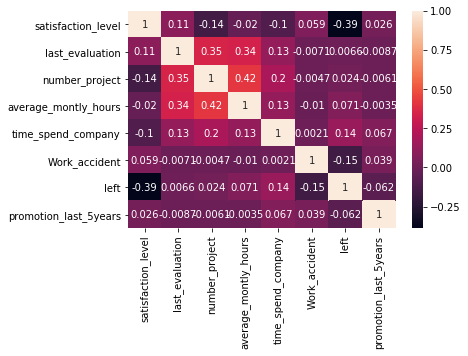

In [51]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**4.** Визуализировать несколько взаимосвязей между переменными

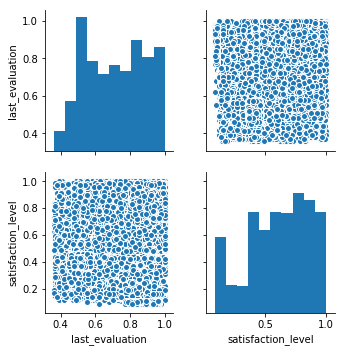

In [54]:
sns.pairplot(hr, vars=['last_evaluation', 'satisfaction_level'],
                 kind='scatter')

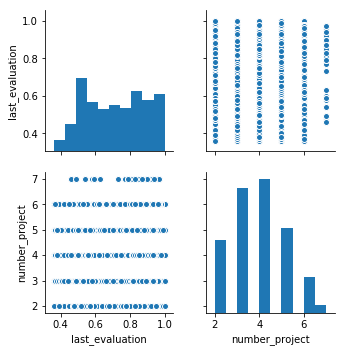

In [65]:
sns.pairplot(hr, vars=['last_evaluation', 'number_project'],
                 kind='scatter')

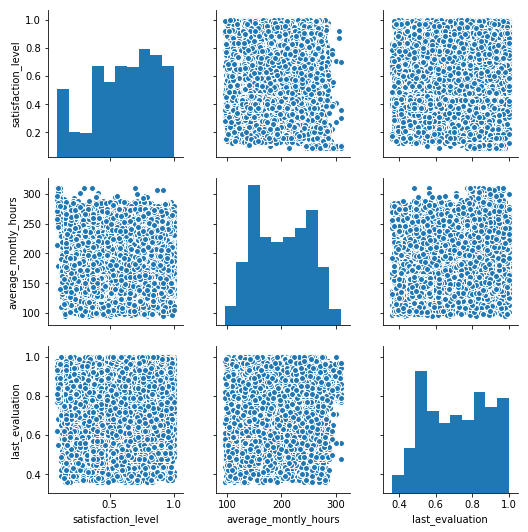

In [55]:
sns.pairplot(hr, vars=['satisfaction_level', 'average_montly_hours','last_evaluation'],
                 kind='scatter')

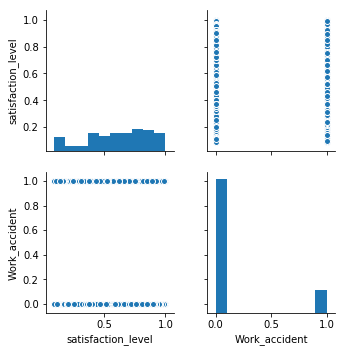

In [59]:
sns.pairplot(hr, vars=['satisfaction_level','Work_accident'],
                 kind='scatter')

**5.** С использованием t-test статистики проверить взаимосвязи между несколькими переменными

**6.** Рассчитать сколько работников работает в каждом департаменте

In [61]:
workers_by_department = hr.pivot_table(index = 'department',  values = 'left', aggfunc = 'count', fill_value = 0,
                 margins = True)
workers_by_department.columns = ['workers_by_department']
print(workers_by_department)

             workers_by_department
department                        
IT                            1227
RandD                          787
accounting                     767
hr                             739
management                     630
marketing                      858
product_mng                    902
sales                         4140
support                       2229
technical                     2720
All                          14999


In [ ]:
#или

In [64]:
department = hr.groupby('department').count()
print(department['satisfaction_level'])

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64


In [66]:
# проекты по количеству сотрудников
workers_in_project = hr.pivot_table(index = 'number_project',  values = 'satisfaction_level', aggfunc = 'count', fill_value = 0,
                 margins = True)
workers_in_project.columns = ['workers_in_project']
print(workers_in_project)

                workers_in_project
number_project                    
2                             2388
3                             4055
4                             4365
5                             2761
6                             1174
7                              256
All                          14999


**7.** Показать распределение сотрудников по зарплатам

In [67]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [68]:
#или

In [69]:
salary_level = hr.pivot_table(index = 'salary',  values = 'satisfaction_level', aggfunc = 'count', fill_value = 0,
                 margins = True)
salary_level.columns = ['salary_level']
print(salary_level)

        salary_level
salary              
high            1237
low             7316
medium          6446
All            14999


**8.** Показать распределение сотрудников по зарплатам совместно с департаментами

In [72]:
salary_by_department = hr.pivot_table(index = 'department', columns = 'salary', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
print(salary_by_department)

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


In [78]:
#распределение сотрудников по зарплатам по департаментам
salary_by_department = hr.pivot_table(index = 'number_project', columns = 'salary', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
print(salary_by_department)

salary          high   low  medium
number_project                    
2                140  1344     904
3                408  1791    1856
4                368  2087    1910
5                245  1317    1199
6                 73   633     468
7                  3   144     109


**9.** Сколько сотрудников покинули компанию

In [73]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [74]:
they_left_company = hr.pivot_table(index = 'left',  values = 'satisfaction_level', aggfunc = 'count', fill_value = 0,
                 margins = True)
they_left_company.columns = ['workers']
print(they_left_company)

      workers
left         
0       11428
1        3571
All     14999


In [75]:
print('Компанию покинули ',(they_left_company.get_value(1, 'workers')), 'сотрудников')

Компанию покинули  3571 сотрудников


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


**10.** Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [ ]:
в зависимотси от проишествий на рабочем месте по каждому проекту
сколько сотрудников ушло с каждого проекта
сколько сотрудников ушло по должностям

In [76]:
workers_by_position = hr.pivot_table(index = 'department',  values = 'Work_accident', aggfunc = 'count', fill_value = 0,
                 margins = True)
workers_by_position.columns = ['workers_by_position']
print(workers_by_position)

             workers_by_position
department                      
IT                          1227
RandD                        787
accounting                   767
hr                           739
management                   630
marketing                    858
product_mng                  902
sales                       4140
support                     2229
technical                   2720
All                        14999


In [ ]:
hr.head()